# CISC867 - Lab 1
## Daniel Lee
Januanry 30, 2019

## Question 1


$\newcommand{\vect}[1]{\boldsymbol{#1}} $

\begin{equation}
\begin{split}
\frac{\partial J(\vect{x})}{\partial w_{i,j}^{(1)}} & = \frac{\partial (f(\vect{x})-y)^2}{\partial w_{i,j}^{(1)}}\\
& = 2(f(\vect{x})-y) \frac{\partial f(\vect{x})}{\partial w_{i,j}^{(1)}} \\ 
& = 2(f(\vect{x})-y)f(x)(1-f(x)) \frac{\partial \substack{\textstyle\Sigma\\_a} w_a^{(3)} h_a^{(2)} + b_a^{(3)}}{\partial w_{i,j}^{(1)}} \\
& = 2(f(\vect{x})-y)f(x)(1-f(x))w_a^{(3)} \frac{\partial h_a^{(2)}}{\partial w_{i,j}^{(1)}} \\
& = 2(f(\vect{x})-y)f(x)(1-f(x))w_a^{(3)}h_a^{(2)}(1-h_a^{(2)}) \frac{\partial \substack{\textstyle\Sigma\\_c} w_c^{(2)} h_c^{(1)} + b_c^{(2)}}{\partial w_{i,j}^{(1)}} \\
& = 2(f(\vect{x})-y)f(x)(1-f(x))w_a^{(3)}h_a^{(2)}(1-h_a^{(2)})w_c^{(2)} \frac{\partial h_c^{(1)}}{\partial w_{i,j}^{(1)}} \\
& = 2(f(\vect{x})-y)f(x)(1-f(x))w_a^{(3)}h_a^{(2)}(1-h_a^{(2)})w_c^{(2)}h_c^{(1)}(1-h_c^{(1)}) \frac{\partial \substack{\textstyle\Sigma\\_i} w_i^{(1)} x_i + b_i^{(1)}}{\partial w_{i,j}^{(1)}} \\
& = 2(f(\vect{x})-y)f(x)(1-f(x))w_a^{(3)}h_a^{(2)}(1-h_a^{(2)})w_c^{(2)}h_c^{(1)}(1-h_c^{(1)})x_d
\end{split}
\end{equation}




* Line 1 by definition of $J(\vect{x})$
* Line 2 derivative of a polynomial and chain rule
* Line 3 derivative of sigmoid(z) and chain rule
* Line 4 derivative of hidden input k of layer 2
* Line 5 derivative of sigmoid(z) and chain rule
* Line 6 derivative of hidden input j of layer 1
* Line 7 derivative of a sigmoid(z) and chain rule
* Line 8 w is matched, marking the end of the back propagation






## Question 2

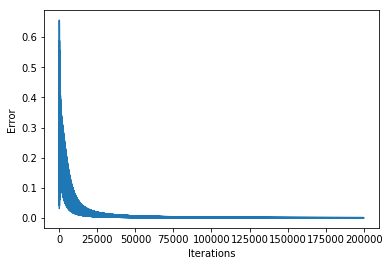

[0.97513076 0.03488417 0.97513076 0.01602933]


In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Network:
    
    def __init__(self, alpha, input_count, hidden_count):
        self.alpha = alpha
        self.input_count = input_count
        self.hidden_count = hidden_count
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z));
    
    def _sigmoid_derivative(self, z):
        return z * (1 - z);
    
    def init(self, X, y):
        '''The function initializes random weights and 
        biases for the network, trains the network, and predicts 
        the XOR values of the inputs.
        '''
        self.w1 = np.random.randn(self.hidden_count, self.input_count)
        self.b1 = np.random.randn(self.hidden_count, 1)
        
        self.w2 = np.random.randn(1, self.hidden_count)
        self.b2 = np.random.randn(1, 1)
        
        epochs = 50000
        errors = self.train(X, y, epochs)
        
        fig,ax = plt.subplots()
        plt.plot(errors)
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Error")
        plt.show()
        
        pred = self.predict(X)
        print(pred)
        
 
        
    def predict(self, X):
        '''This function predicts the XOR values using the final 
        weights and biases.
        '''
        y_predicted = np.array([])
        for xp in range(0, X.shape[0]):
            xp1 = X[xp].reshape(self.input_count, 1)
            z1 = np.dot(self.w1, xp1) + self.b1
            h1 = self._sigmoid(z1)
            z2 = np.dot(self.w2, h1) + self.b2
            output = self._sigmoid(z2)
            
            y_predicted = np.append(y_predicted, output)
        return y_predicted;
        
        
    def train(self, X, y, epochs):
        '''The function performs a forward pass to obtain the 
        activation vectors, then computes the error that needs to be
        minimized, and then performs backward propagation to
        acquire the deltas using sigmoid prime, and then
        updates the weights.
        '''
        errors = []
        for steps in range(epochs): 
            for i in range(0, X.shape[0]):
                x_input = X[i].reshape(self.input_count, 1)
                y_label = y[i]

                # Forward pass
                z1 = np.dot(self.w1, x_input) + self.b1
                h1 = self._sigmoid(z1)

                z2 = np.dot(self.w2, h1) + self.b2
                output = self._sigmoid(z2)
                errors.append(np.square(output - y_label).sum())
                
                output_delta = (output - y_label) * self._sigmoid_derivative(output)

                # Back propagation
                d_w2 = np.dot(2 * output_delta, h1.T)
                d_b2 = 2 * output_delta
                d_b1 = (np.dot(self.w2.reshape(self.hidden_count, 1), d_b2) * self._sigmoid_derivative(h1)).reshape(self.hidden_count, 1)
                d_w1 = np.dot(d_b1, x_input.reshape(1, self.input_count))

                # Update weights and biases
                self.w2 -= self.alpha * d_w2
                self.b2 -= self.alpha * d_b2
                self.w1 -= self.alpha * d_w1
                self.b1 -= self.alpha * d_b1
        
        
        return errors;
    
X = np.array([[1,0],[0,0],[1,0],[1,1]])
y = np.array([1, 0, 1, 0])

mynetwork = Network(0.01, 2, 4)
mynetwork.init(X, y)



## Question 3:

# The network does not converge or learn because when the value of the weights are greater than 5, the z = wx + b value becomes higher, making the output of sigmoid always high or 1.

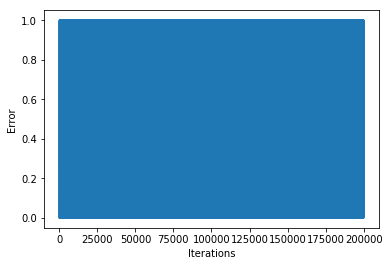

[1.         0.99998771 1.         1.        ]


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Network:
    
    def __init__(self, alpha, input_count, hidden_count):
        self.alpha = alpha
        self.input_count = input_count
        self.hidden_count = hidden_count
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z));
    
    def _sigmoid_derivative(self, z):
        return z * (1 - z);
    
    def init(self, X, y):
        '''The function initializes random weights and 
        biases for the network, trains the network, and predicts 
        the XOR values of the inputs. Added 5 to have weights >= 5
        '''
        self.w1 = np.random.randn(self.hidden_count, self.input_count) + 5
        self.b1 = np.random.randn(self.hidden_count, 1)
        
        self.w2 = np.random.randn(1, self.hidden_count) + 5
        self.b2 = np.random.randn(1, 1)
        
        epochs = 50000
        errors = self.train(X, y, epochs)
        
        fig,ax = plt.subplots()
        plt.plot(errors)
        ax.set_xlabel("Iterations")
        ax.set_ylabel("Error")
        plt.show()
        
        pred = self.predict(X)
        print(pred)
        
 
        
    def predict(self, X):
        '''This function predicts the XOR values using the final 
        weights and biases.
        '''
        y_predicted = np.array([])
        for xp in range(0, X.shape[0]):
            xp1 = X[xp].reshape(self.input_count, 1)
            z1 = np.dot(self.w1, xp1) + self.b1
            h1 = self._sigmoid(z1)
            z2 = np.dot(self.w2, h1) + self.b2
            output = self._sigmoid(z2)
            
            y_predicted = np.append(y_predicted, output)
        return y_predicted;
        
        
    def train(self, X, y, epochs):
        '''The function performs a forward pass to obtain the 
        activation vectors, then computes the error that needs to be
        minimized, and then performs backward propagation to
        acquire the deltas using sigmoid prime, and then
        updates the weights.
        '''
        errors = []
        for steps in range(epochs): 
            for i in range(0, X.shape[0]):
                x_input = X[i].reshape(self.input_count, 1)
                y_label = y[i]

                # Forward pass
                z1 = np.dot(self.w1, x_input) + self.b1
                h1 = self._sigmoid(z1)

                z2 = np.dot(self.w2, h1) + self.b2
                output = self._sigmoid(z2)
                errors.append(np.square(output - y_label).sum())
                
                output_delta = (output - y_label) * self._sigmoid_derivative(output)

                # Back propagation
                d_w2 = np.dot(2 * output_delta, h1.T)
                d_b2 = 2 * output_delta
                d_b1 = (np.dot(self.w2.reshape(self.hidden_count, 1), d_b2) * self._sigmoid_derivative(h1)).reshape(self.hidden_count, 1)
                d_w1 = np.dot(d_b1, x_input.reshape(1, self.input_count))

                # Update weights and biases
                self.w2 -= self.alpha * d_w2
                self.b2 -= self.alpha * d_b2
                self.w1 -= self.alpha * d_w1
                self.b1 -= self.alpha * d_b1
        
        return errors;
    
X = np.array([[1,0],[0,0],[1,0],[1,1]])
y = np.array([1, 0, 1, 0])

mynetwork = Network(0.01, 2, 4)
mynetwork.init(X, y)
